# **Flattened Feature Set**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import requests


# URL of the raw .npz file
url_train = "https://github.com/psarath22/CS771_M1/raw/main/datasets/train/train_feature.npz"
url_valid = "https://github.com/psarath22/CS771_M1/raw/main/datasets/valid/valid_feature.npz"
url_test = "https://github.com/psarath22/CS771_M1/raw/main/datasets/test/test_feature.npz"
# Download the file
response1 = requests.get(url_train)
response2= requests.get(url_valid)
response3 = requests.get(url_test)

# Save the content to a file
with open('train_feature.npz', 'wb') as f:
    f.write(response1.content)
    print("Downloading TrainData completed!")

# Save the content to a file
with open('valid_feature.npz', 'wb') as f:
    f.write(response2.content)
    print("Downloading validData completed!")

# Save the content to a file
with open('test_feature.npz', 'wb') as f:
    f.write(response3.content)
    print("Downloading TestData completed!")


# read feat dataset
train_feat = np.load("train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

test_feat_X = np.load("test_feature.npz", allow_pickle=True)['features']

valid_feat = np.load("valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']


print(f"Train dataset size: ")
print(f"train_feat_X: {len(train_feat_X)} train_feat_Y: {len(train_feat_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_feat_X: {len(valid_feat_X)} valid_feat_Y: {len(valid_feat_Y)}")

print()
print("Test dataset size: ")
print(f"test_feat_X: {len(test_feat_X)}")


Train dataset size: 
train_feat_X: 7080 train_feat_Y: 7080

Valid dataset size: 
valid_feat_X: 489 valid_feat_Y: 489

Test dataset size: 
test_feat_X: 2232


In [95]:
# Create the training and validation  dataset

X_train = np.array([feat for feat in train_feat_X])
print(X_train.shape)
X_valid = np.array([feat for feat in valid_feat_X])
print(X_valid.shape)
X_test = np.array([feat for feat in test_feat_X])
print(X_test.shape)

X_train = np.array([feat.flatten() for feat in X_train])
print(X_train.shape)
X_valid = np.array([feat.flatten() for feat in X_valid])
print(X_valid.shape)
X_test = np.array([feat.flatten() for feat in X_test])
print(X_test.shape)

(7080, 13, 768)
(489, 13, 768)
(2232, 13, 768)
(7080, 9984)
(489, 9984)
(2232, 9984)


# ***Logistic Regression***

In [96]:
# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Validation Accuracy with Logistic Regression: 0.9856850715746421
Train Accuracy with Logistic Regression: 0.9951977401129943
f1 score with logistic Regression: 0.9856841127114566
Number of trainable parameters: 9985


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.997881             0.934560
1          40           0.995763             0.969325
2          60           0.996234             0.975460
3          80           0.994350             0.985685
4         100           0.995198             0.985685


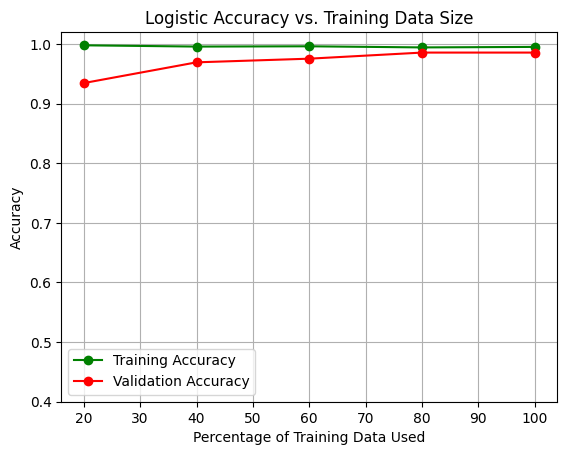

In [97]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_feat_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_feat_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***KNN***

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with KNN Regression: {f1}")

Validation Accuracy with KNN: 0.869120654396728
Train Accuracy with KNN: 0.9330508474576271
f1 score with KNN Regression: 0.869120654396728


# ***LwP***

In [99]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_feat_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with LwP Regression: {f1}")

Train Accuracy with LWP: 0.9536723163841808
Validation Accuracy with LWP: 0.9366053169734151
f1 score with LwP Regression: 0.9366201674159853


# ***SVM Classifier***

In [100]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

# Calculate validation accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")


Validation Accuracy with SVM: 0.9856850715746421
Train Accuracy with SVM: 0.9925141242937853
f1 score with SVM: 0.9856841127114566
Number of trainable parameters: 9985


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.996469             0.942740
1          40           0.993644             0.957055
2          60           0.990348             0.971370
3          80           0.991702             0.985685
4         100           0.992514             0.985685


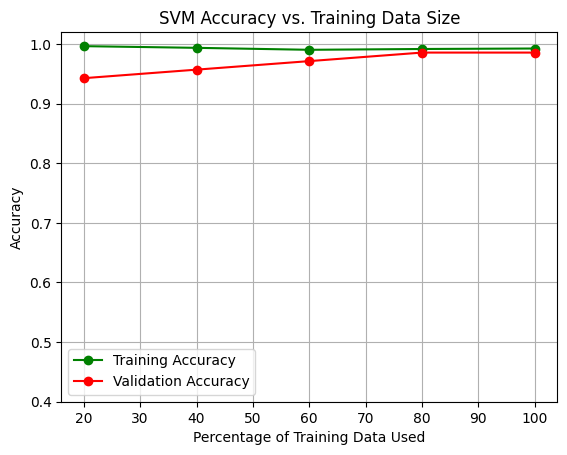

In [101]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_feat_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_feat_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# **With Principal Component Analysis (PCA) Feature Extraction**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import requests


# URL of the raw .npz file
url_train = "https://github.com/psarath22/CS771_M1/raw/main/datasets/train/train_feature.npz"
url_valid = "https://github.com/psarath22/CS771_M1/raw/main/datasets/valid/valid_feature.npz"
url_test = "https://github.com/psarath22/CS771_M1/raw/main/datasets/test/test_feature.npz"
# Download the file
response1 = requests.get(url_train)
response2= requests.get(url_valid)
response3 = requests.get(url_test)

# Save the content to a file
with open('train_feature.npz', 'wb') as f:
    f.write(response1.content)
    print("Downloading TrainData completed!")

# Save the content to a file
with open('valid_feature.npz', 'wb') as f:
    f.write(response2.content)
    print("Downloading validData completed!")

# Save the content to a file
with open('test_feature.npz', 'wb') as f:
    f.write(response3.content)
    print("Downloading TestData completed!")


# read feat dataset
train_feat = np.load("train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

test_feat_X = np.load("test_feature.npz", allow_pickle=True)['features']

valid_feat = np.load("valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']


print(f"Train dataset size: ")
print(f"train_feat_X: {len(train_feat_X)} train_feat_Y: {len(train_feat_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_feat_X: {len(valid_feat_X)} valid_feat_Y: {len(valid_feat_Y)}")

print()
print("Test dataset size: ")
print(f"test_feat_X: {len(test_feat_X)}")


Train dataset size: 
train_feat_X: 7080 train_feat_Y: 7080

Valid dataset size: 
valid_feat_X: 489 valid_feat_Y: 489

Test dataset size: 
test_feat_X: 2232


In [103]:
# Create the training and validation  dataset

X_train = np.array([feat for feat in train_feat_X])
print(X_train.shape)
X_valid = np.array([feat for feat in valid_feat_X])
print(X_valid.shape)
X_test = np.array([feat for feat in test_feat_X])
print(X_test.shape)

X_train = np.array([feat.flatten() for feat in X_train])
X_valid = np.array([feat.flatten() for feat in X_valid])
X_test = np.array([feat.flatten() for feat in X_test])

from sklearn.decomposition import PCA
n_components = 200
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7080, 13, 768)
(489, 13, 768)
(2232, 13, 768)
(7080, 200)
(489, 200)
(2232, 200)


# ***Logistic Regression***

In [104]:
# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")


Validation Accuracy with Logistic Regression: 0.9795501022494888
Train Accuracy with Logistic Regression: 0.9896892655367232
f1 score with logistic Regression: 0.9795523273714443
Number of trainable parameters: 201


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.997175             0.944785
1          40           0.992585             0.969325
2          60           0.991761             0.979550
3          80           0.990466             0.979550
4         100           0.989689             0.979550


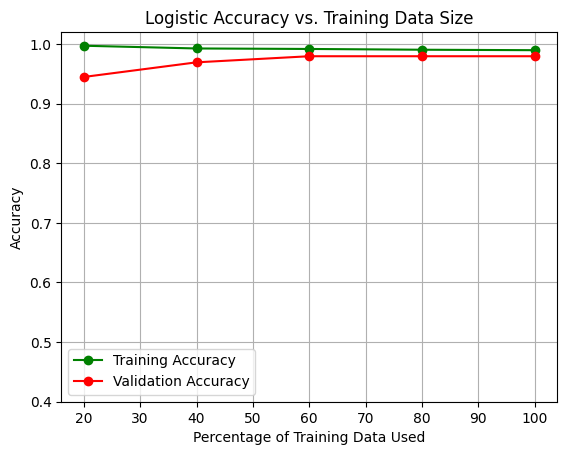

In [105]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_feat_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_feat_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***KNN***

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with KNN Regression: {f1}")

Validation Accuracy with KNN: 0.8670756646216768
Train Accuracy with KNN: 0.931497175141243
f1 score with KNN Regression: 0.8670667608920972


# ***LwP***

In [107]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_feat_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with LwP Regression: {f1}")

Train Accuracy with LWP: 0.9533898305084746
Validation Accuracy with LWP: 0.9366053169734151
f1 score with LwP Regression: 0.9366201674159853


# ***SVM Classifier***

In [108]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_feat_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

# Calculate validation accuracy
train_accuracy = accuracy_score(train_feat_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

f1 = f1_score(valid_feat_Y, valid_predictions, average='weighted')
print(f"f1 score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Validation Accuracy with SVM: 0.9795501022494888
Train Accuracy with SVM: 0.9864406779661017
f1 score with SVM: 0.9795501022494888
Number of trainable parameters: 201


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.995056             0.936605
1          40           0.988701             0.973415
2          60           0.989407             0.979550
3          80           0.988524             0.981595
4         100           0.986441             0.979550


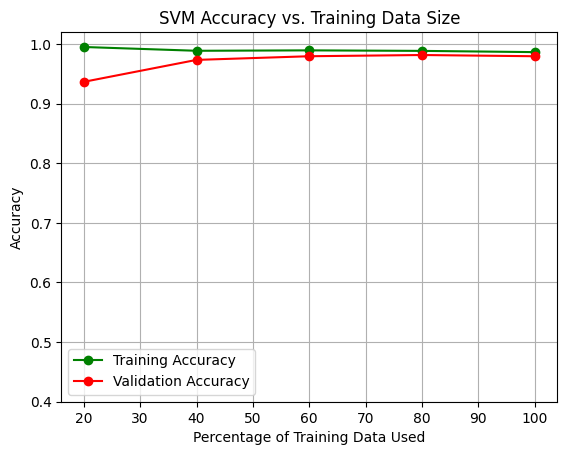

In [109]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_feat_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_feat_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_feat_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***Deep Neural Network***